# Projeto 2 - Ciência dos dados


### Felipe Rocha Sigiani             -- Turma: C
### João Vitor Rodrigues Silva     --    Turma: C
### Lucas Henrique Lemes Silva         --     Turma: B
### Matheus de Souza Pamplona Silva    --    Turma: B


In [54]:
import pandas as pd
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
arquivo = open("teste-ab.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [7]:
for k,v in dados_fire["logs"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [8]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [9]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [10]:
dataframe

,tempo,tipo,user_id,versao
0,1479319080133,inicio,59943695,A
1,1479287856483,inicio,158080108,B
2,1479289809776,inicio,753415774,A
3,1479323431087,final,2914033577,A
4,1479303306549,inicio,3412371675,A
5,1478304048184,inicio,1355150594,A
6,1479290383513,inicio,3187205062,A
7,1479290602968,final,2779827600,A
8,1479323243188,inicio,2846377697,A
9,1479289016581,inicio,785509936,A


In [11]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [12]:
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once

In [13]:
users = list(users) 

In [14]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [15]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
166,1479323253232,inicio,1966625919,B
42,1479323258303,final,1966625919,B


In [16]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [17]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

In [18]:
dataframe_resumo

,delta_t,user_id,versao
0,43235.968,1355150594,B
1,6.483,1561760900,B
2,30123.142,3789181448,B
3,14.813,2627218697,B
4,891.071,3705282954,A
5,19.305,2347875977,A
6,27.339,3643720589,A
7,2.715,2779827600,A
8,31.059,2779827600,B
9,8.915,2205262229,A


In [36]:
resultados_A=dataframe_resumo.query('versao == "A" and delta_t < 100 and delta_t>0')
resultados_B=dataframe_resumo.query('versao == "B" and delta_t < 100 and delta_t>0')

In [40]:
resultados_A.delta_t.describe()

count    20.000000
mean     13.020650
std      12.035537
min       2.393000
25%       5.369250
50%       8.927500
75%      13.891250
max      52.719000
Name: delta_t, dtype: float64

In [39]:
resultados_B.delta_t.describe()

count    14.000000
mean     13.433143
std      10.958310
min       4.477000
25%       6.312750
50%       8.281500
75%      16.506500
max      40.096000
Name: delta_t, dtype: float64

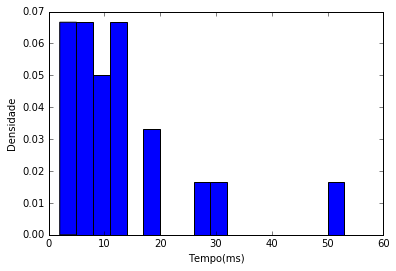

In [50]:
plt.hist(resultados_A.delta_t, bins = range(2,55,3), normed = 1)
plt.ylabel("Densidade")
plt.xlabel("Tempo(ms)")
plt.show()

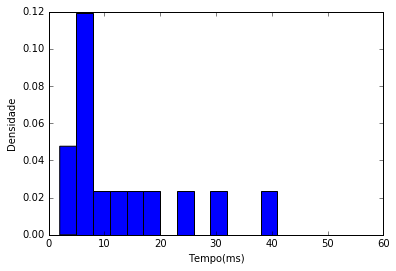

In [52]:
plt.hist(resultados_B.delta_t, bins = range(2,55,3), normed = 1)
plt.ylabel("Densidade")
plt.xlabel("Tempo(ms)")
plt.show()

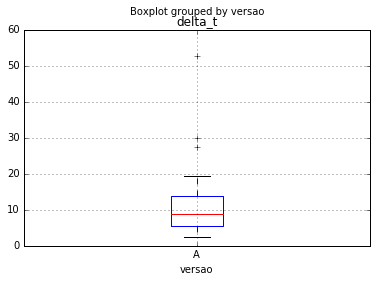

In [55]:
resultados_A.boxplot(column = "delta_t", by = "versao")

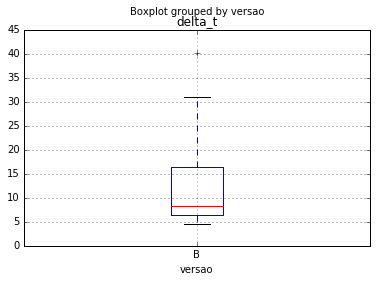

In [56]:
resultados_B.boxplot(column = "delta_t", by = "versao")

(array([ 0.00130872,  0.00414427,  0.01526837,  0.04449641,  0.09379144,
         0.18278425,  0.25149194,  0.32303518,  0.33154184,  0.30056886,
         0.24145844,  0.17624066,  0.10753298,  0.05801982,  0.03031863,
         0.0111241 ,  0.00458051,  0.0021812 ,  0.00065436,  0.00065436]),
 array([  9.06522 ,   9.523684,   9.982148,  10.440612,  10.899076,
         11.35754 ,  11.816004,  12.274468,  12.732932,  13.191396,
         13.64986 ,  14.108324,  14.566788,  15.025252,  15.483716,
         15.94218 ,  16.400644,  16.859108,  17.317572,  17.776036,  18.2345  ]),
 <a list of 20 Patch objects>)

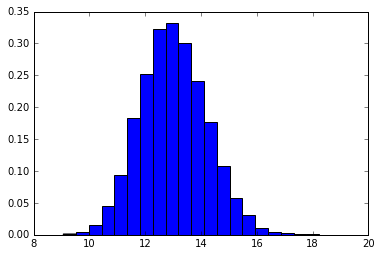

In [57]:
mediaA = []
for i in range(10000):
    mediaA.append(np.mean(np.random.choice(resultados_A.delta_t,size = 100)))
x_barra = pd.Series(mediaA)
plt.hist(x_barra, bins = 20, normed = 1)

(array([ 0.00085682,  0.00128522,  0.00878236,  0.02677548,  0.06704581,
         0.13259219,  0.21805953,  0.30245585,  0.33651426,  0.32623248,
         0.25254635,  0.1942829 ,  0.13237798,  0.07175829,  0.03919931,
         0.01927835,  0.00642612,  0.00428408,  0.00085682,  0.00042841]),
 array([  8.79975 ,   9.266595,   9.73344 ,  10.200285,  10.66713 ,
         11.133975,  11.60082 ,  12.067665,  12.53451 ,  13.001355,
         13.4682  ,  13.935045,  14.40189 ,  14.868735,  15.33558 ,
         15.802425,  16.26927 ,  16.736115,  17.20296 ,  17.669805,
         18.13665 ]),
 <a list of 20 Patch objects>)

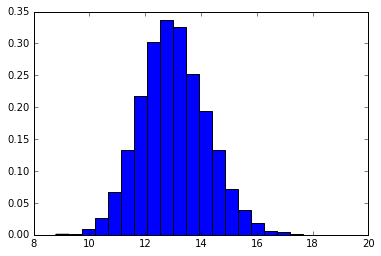

In [58]:
mediaA = []
for i in range(10000):
    mediaA.append(np.mean(np.random.choice(resultados_A.delta_t,size = 100)))
x_barra = pd.Series(mediaA)
plt.hist(x_barra, bins = 20, normed = 1)